Project ML
ML | Heart Disease Prediction Using Logistic Regression, Decision tree, Random forest, and XGBoost

------------------------
link for dataset

[framingham.csv](https://drive.google.com/file/d/1qFLBnUKYdpWwAK5jhIwuDA2vKENqbrnh/view?usp=share_link)

---------------------------------------------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

IMPORT DATA

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

DATA PREPARATION

loading dataset

In [ ]:
# dataset
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)


FileNotFoundError: [Errno 2] No such file or directory: 'framingham.csv'

handling missing values

In [ ]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

SPLITTING DATA INTO TEST SET AND TRAIN SET

In [ ]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset   #คือz score
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


**Exploratory Data Analysis of Heart Disease Dataset**
Ten Year’s CHD Record of all the patients available in the dataset:



<ipython-input-8-bc59419c8daf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


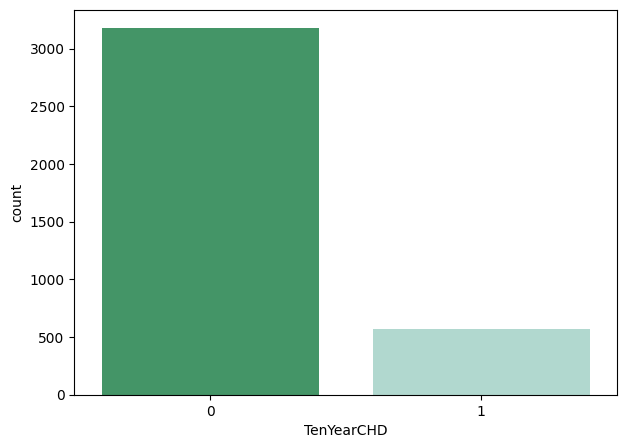

In [ ]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

# This code is modified by Susobhan Akhuli


Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)

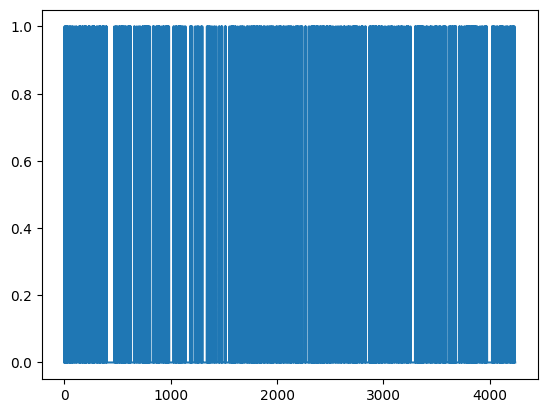

In [ ]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)


In [ ]:
# prompt: handled imbalanced data using smote oversampling
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# %matplotlib inline  # This is a Jupyter Notebook magic command

# dataset
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

# Method 1: Fitting Logistic Regression Model for Heart Disease Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


  Evaluating Logistic Regression Model

In [ ]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.6713836477987422


In [ ]:
# prompt: using cross validation, f2-score precision:recall = 1:2

from sklearn.metrics import make_scorer, fbeta_score

# Define the F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Assuming 'logreg' is your LogisticRegression model and 'X', 'y' are your data
scores = cross_val_score(logreg, X, y, cv=5, scoring=f2_scorer)  # 5-fold cross-validation

print("F2 scores for each fold:", scores)
print("Mean F2 score:", scores.mean())
print("Standard Deviation of F2 scores:", scores.std())

F2 scores for each fold: [0.69518717 0.6838143  0.71095208 0.69505322 0.69040925]
Mean F2 score: 0.6950832051901126
Standard Deviation of F2 scores: 0.008951726845761114


Confusion matrix

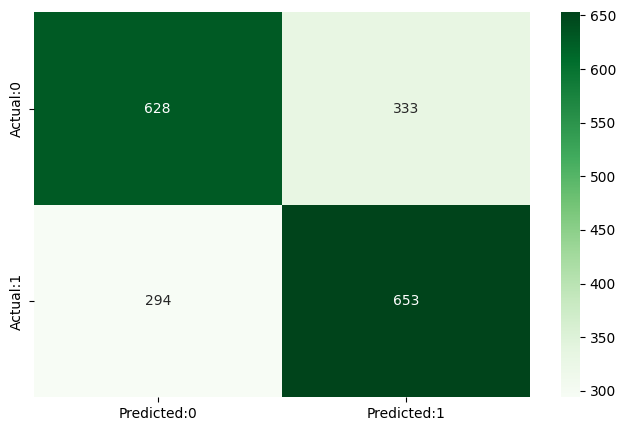

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       961
           1       0.66      0.69      0.68       947

    accuracy                           0.67      1908
   macro avg       0.67      0.67      0.67      1908
weighted avg       0.67      0.67      0.67      1908



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is modified by Susobhan Akhuli


# Optimization Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'] # Solvers compatible with both penalties
}

# Create a LogisticRegression object
logreg = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1') # Use f1 scoring

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_logreg = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       961
           1       0.66      0.70      0.68       947

    accuracy                           0.67      1908
   macro avg       0.67      0.67      0.67      1908
weighted avg       0.68      0.67      0.67      1908



In [ ]:
# prompt: using cross validation, f2-score precision:recall = 1:2 (the model with hyper parameter : {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

from sklearn.metrics import make_scorer, fbeta_score

# Define the F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Specify the hyperparameters you want to use
hyperparameters = {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

# Create a LogisticRegression model with the specified hyperparameters
logreg = LogisticRegression(**hyperparameters, max_iter=1000)

# Perform cross-validation with the F2 scorer
scores = cross_val_score(logreg, X, y, cv=5, scoring=f2_scorer)

print("F2 scores for each fold:", scores)
print("Mean F2 score:", scores.mean())
print("Standard Deviation of F2 scores:", scores.std())

F2 scores for each fold: [0.69924576 0.68025078 0.70939639 0.69640063 0.69513716]
Mean F2 score: 0.6960861429919935
Standard Deviation of F2 scores: 0.009369140166106966


# Method2:Decision Tree Classifier

จะเป็นการทำ decision tree โดยใช้  grid search cross validation มาช่วยเพื่อหาค่า hyperparameter ที่ทำให้ได้ค่า f2 ที่ดีที่สุด


ปัญหาที่พบ เมื่อกำหนด choice ของ max death ให้มี none หรือ ค่าที่มากเกินไป จะทำให้ decision tree ที่ออกมา เป็น largest tree(ไม่ได้ prun นั่นเอง)

Best F2 Score from GridSearchCV: 0.79
Test F2 Score: 0.79

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       961
           1       0.75      0.80      0.78       947

    accuracy                           0.77      1908
   macro avg       0.77      0.77      0.77      1908
weighted avg       0.77      0.77      0.77      1908


Confusion Matrix:
 [[712 249]
 [187 760]]


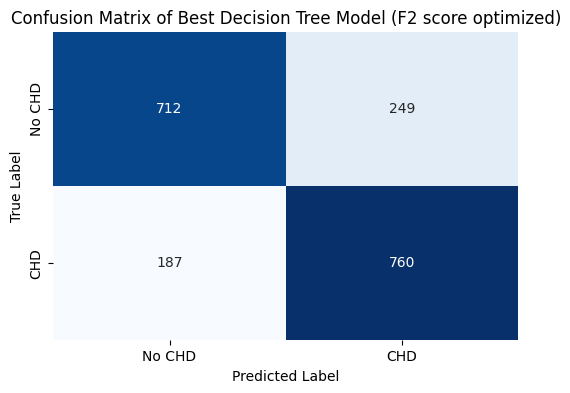

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



# Step 1: Define the model
tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV with 5 important hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10, 12, ],  # List of depths to try, including None (no limit)--should not put none because it mean we use largest tree(no prunning)
    'min_samples_split': [2, 5,7,10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4,6],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Criterion for splitting nodes
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for splitting
}

# Step 2: Define the custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Step 3: Initialize GridSearchCV with 5-fold cross-validation and optimize for F2 score
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring=f2_scorer)

# Step 4: Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_f2_score = grid_search.best_score_

# Step 6: Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the model using F2 score, classification report, and confusion matrix
# F2 score on test set
f2_score_value = fbeta_score(y_test, y_pred, beta=2)
print(f"Best F2 Score from GridSearchCV: {best_f2_score:.2f}")
print(f"Test F2 Score: {f2_score_value:.2f}")
print("\nBest Hyperparameters: ", best_params)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 8: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Best Decision Tree Model (F2 score optimized)")
plt.show()



The 5 hyperparameters in the Decision Tree model that affect overfitting are:

max_depth: Controls the maximum depth of the tree. A larger depth allows the tree to grow deeper, potentially leading to overfitting by memorizing the training data. Limiting the depth helps prevent overfitting by simplifying the model.

min_samples_split: Specifies the minimum number of samples required to split a node. Lower values (e.g., 2) can lead to overfitting because nodes can split even with few samples, capturing noise. Higher values make the model simpler and more general.

min_samples_leaf: Determines the minimum number of samples required at a leaf node. Smaller values (e.g., 1) lead to more complex trees that may overfit. Increasing this value forces the tree to be simpler and generalizes better.

criterion: Specifies the function to measure the quality of a split (e.g., "gini" or "entropy"). The choice of criterion affects how splits are made, but doesn't directly prevent overfitting. It's the tree structure that determines complexity.

max_features: Limits the number of features considered at each split. Using fewer features (e.g., sqrt or log2) can prevent overfitting by reducing the model's complexity, as it doesn't rely on all features for every split.

**model evaluate**


Predictions: The best model (with the best hyperparameters) is used to make predictions on the test set (X_test).

F2 Score: The F2 score is calculated on the test set to evaluate model performance.

Classification Report: Provides a detailed report of the model's precision, recall, F1-score, and support.

Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives.

# Method3:Random forest

In [ ]:
# prompt: use python create random forest model for dataset framingham.csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and split your data

# Initialize the Random Forest Classifier (consider hyperparameter tuning)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions

y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

find hyperparameter of random forest

1) use grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# กำหนดช่วงของค่าพารามิเตอร์ที่ต้องการทดลอง
param_grid = {
    'n_estimators': [100, 200, 500],
     'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# สร้างโมเดล Random Forest
rf = RandomForestClassifier(random_state=42)

# ทำ Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 500}


เทสจากทีละ parameter ได้เเก่

1) max_depth
2) min_sample_split
3) max_leaf_nodes
4) min_samples_leaf
5) n_estimators
6) max_sample (bootstrap sample)
7) max_features
วัดแต่ละเเบบด้วยF1 score เพราะอยากให้balance

==================1) find hyper for max_depth

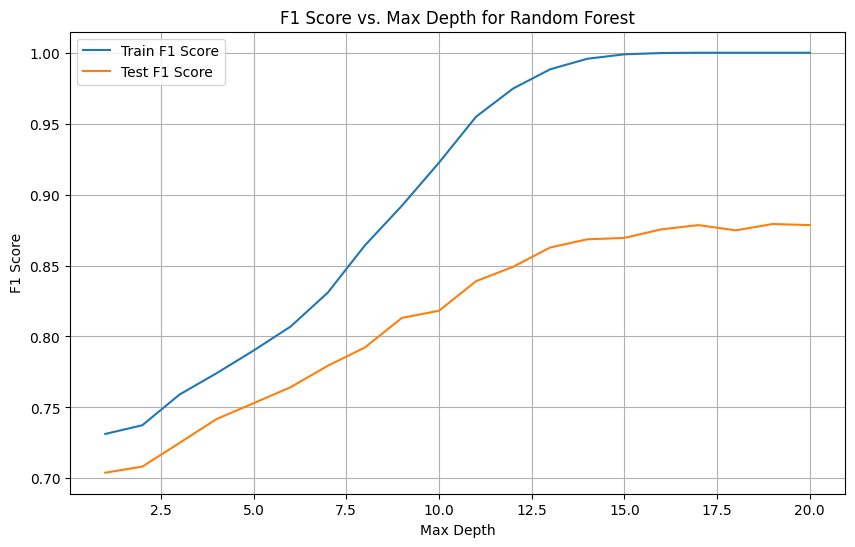

In [ ]:
# prompt: # prompt: find hyperparameter for max dept of random forest above and then plot the graph between y=F1 score and x= parameter value . There are two lines ; train data and test data

from sklearn.metrics import f1_score

# Define the parameter grid for max_depth
param_grid = {'max_depth': range(1, 21)}  # Test depths from 1 to 20

# Initialize lists to store results
train_f1_scores = []
test_f1_scores = []
depths = []

# Loop through the parameter values
for depth in param_grid['max_depth']:
    # Initialize and train the model with the current parameter value
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = rf_model.predict(X_train)

    # Predict on test data
    y_test_pred = rf_model.predict(X_test)

    # Calculate F1 scores
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Append results to lists
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    depths.append(depth)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_f1_scores, label='Train F1 Score')
plt.plot(depths, test_f1_scores, label='Test F1 Score')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Max Depth for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: using random search for those 7 hyper parameters

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import fbeta_score, make_scorer

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'max_depth': randint(10, 50),  # Random integer between 10 and 50
    'min_samples_split': randint(2, 20),
    'max_leaf_nodes': randint(10, 50),
    'min_samples_leaf': randint(1, 16),
    'n_estimators': randint(100, 500),
    'max_samples': uniform(0.5, 0.5),  # Random float between 0.5 and 1.0
    'max_features': ['sqrt', 'log2', None] + [uniform(0.1,0.9).rvs() for i in range(3)],
    # Randomly choose from 'sqrt', 'log2', None, or a random float
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=53)

f2_scorer = make_scorer(fbeta_score, beta=2)  # beta=2 for F2 score

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring=f2_scorer, n_jobs=-1, random_state=53)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=53)
best_rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_rf_model.predict(X_test)
f2_scorer = accuracy_score(y_test, y_pred)
print(f"F2 with best hyperparameters: {f2_scorer}")

Best Hyperparameters: {'max_depth': 43, 'max_features': 0.939732391100374, 'max_leaf_nodes': 33, 'max_samples': 0.9498543631218552, 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 485}


NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

# Assuming 'best_rf_model' is your trained Random Forest model
# and 'X', 'y' are your feature and target data

# Create an F2 scorer (beta=2)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Perform 5-fold cross-validation with the F2 scorer
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring=f2_scorer)

# Print the cross-validation scores for each fold
print("Cross-Validation F2 Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the F2 scores
print("Mean F2 Score:", cv_scores.mean())
print("Standard Deviation of F2 Score:", cv_scores.std())

the hyperparameter for max dept is 3 at จุดตัด

# Method5:XGBoost

มีการปรับค่าน้ำหนัก ด้วย hyperparameter ให้ความสำคัญกับ recall



In [ ]:
import numpy as np
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Custom scoring function for F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5]
}

# Use GridSearchCV with the F2 score as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=f2_scorer,  # Use F2 score as the metric
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# print best hyperparameter
print("Best parameters: ", grid_search.best_params_)


# Predict and evaluate the model
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:54:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


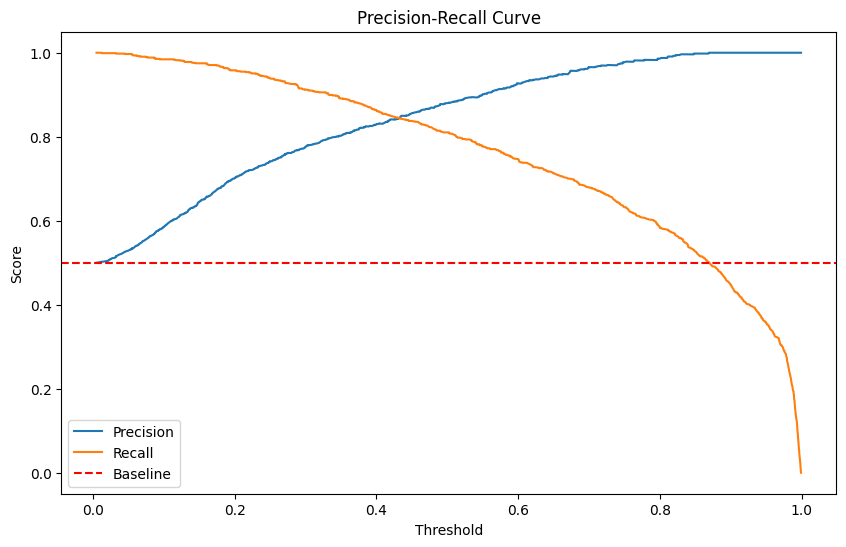

F2 Score (threshold=0.43): 0.8445
Confusion Matrix (adjusted predictions):
 [[802 151]
 [148 807]]
Classification Report (adjusted predictions):
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       953
           1       0.84      0.85      0.84       955

    accuracy                           0.84      1908
   macro avg       0.84      0.84      0.84      1908
weighted avg       0.84      0.84      0.84      1908



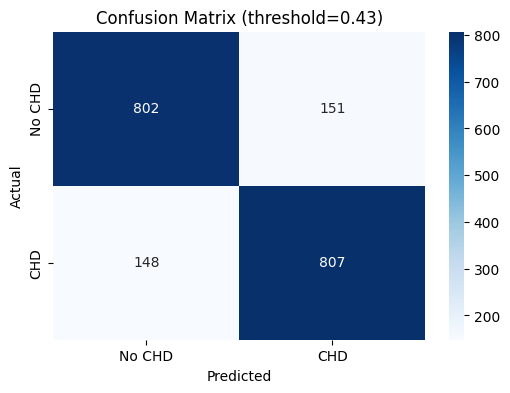

In [ ]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axhline(y=0.5, color='r', linestyle='--', label='Baseline')  # Optional, indicates a threshold reference
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Calculate F2 score using the chosen threshold
chosen_threshold = 0.43  # Adjust as needed to achieve desired balance
y_pred_adjusted = (y_pred_prob >= chosen_threshold).astype(int)

# Calculate and print F2 score
f2_score = fbeta_score(y_test, y_pred_adjusted, beta=2)

# Calculate confusion matrix for adjusted predictions

conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
# Print evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score

# Calculate confusion matrix and F2 score for adjusted predictions
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
f2_adjusted = fbeta_score(y_test, y_pred_adjusted, beta=2)

print(f"F2 Score (threshold={chosen_threshold}): {f2_adjusted:.4f}")
print("Confusion Matrix (adjusted predictions):\n", conf_matrix_adjusted)
print("Classification Report (adjusted predictions):\n", classification_report(y_test, y_pred_adjusted))

# Plot Confusion Matrix as a heatmap for adjusted predictions
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (threshold={chosen_threshold})")
plt.show()

In [ ]:
# Predict and evaluate the model
y_pred = best_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost model Accuracy: {accuracy:.4f}")

XGBoost model Accuracy: 0.8501


In [ ]:
from sklearn.metrics import accuracy_score, recall_score # Importing recall_score


# ประเมินผลในชุดข้อมูลฝึก
y_train_pred = best_model.predict(X_train_resampled)
training_recall = recall_score(y_train_resampled, y_train_pred) # Now recall_score is defined
training_accuracy = accuracy_score(y_train_resampled, y_train_pred)

print("Training Recall:", training_recall)
print("Training Accuracy:", training_accuracy)

# ประเมินผลในชุดข้อมูลทดสอบ
test_recall = recall_score(y_test, y_pred_adjusted)
test_accuracy = accuracy_score(y_test, y_pred_adjusted)

print("Test Recall:", test_recall)
print("Test Accuracy:", test_accuracy)

Training Recall: 0.889487870619946
Training Accuracy: 0.9303683737646001
Test Recall: 0.8450261780104712
Test Accuracy: 0.8432914046121593
